In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [124]:
df = pd.read_csv('cleaned_listings.csv')

In [125]:
df.drop(['id'],axis=1,inplace=True)

In [126]:
df.head()

,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,...,property_type_Serviced apartment,property_type_Townhouse,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict
0,60,0,1.0,1.0,1,0,1,2,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,100,0,8.0,8.0,1,1,0,4,1.0,1.0,...,0,0,1,0,0,0,0,1,1,0
2,60,0,5.0,5.0,1,1,0,2,1.0,0.0,...,0,0,0,0,0,0,0,1,0,1
3,100,0,4.0,4.0,1,1,1,2,1.0,1.0,...,0,0,1,0,0,0,0,1,0,1
4,100,0,1.0,1.0,1,1,1,2,1.0,1.0,...,0,0,1,0,0,0,1,0,0,1


In [127]:
x = df.columns

In [128]:
for i in range(0,len(x)):
    print(i,x[i])

0 host_response_rate
1 host_is_superhost
2 host_listings_count
3 host_total_listings_count
4 host_has_profile_pic
5 host_identity_verified
6 is_location_exact
7 accommodates
8 bathrooms
9 bedrooms
10 beds
11 price
12 security_deposit
13 cleaning_fee
14 guests_included
15 extra_people
16 minimum_nights
17 maximum_nights
18 minimum_minimum_nights
19 maximum_minimum_nights
20 minimum_maximum_nights
21 maximum_maximum_nights
22 minimum_nights_avg_ntm
23 maximum_nights_avg_ntm
24 availability_30
25 availability_60
26 availability_90
27 availability_365
28 number_of_reviews
29 number_of_reviews_ltm
30 review_scores_rating
31 review_scores_accuracy
32 review_scores_cleanliness
33 review_scores_checkin
34 review_scores_communication
35 review_scores_location
36 review_scores_value
37 instant_bookable
38 require_guest_profile_picture
39 require_guest_phone_verification
40 calculated_host_listings_count
41 calculated_host_listings_count_entire_homes
42 calculated_host_listings_count_private_room

#### Array of Values

In [130]:
df_array = df.values

In [131]:
df_array.shape

(50220, 79)

#### Scaling

In [132]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(df_array)
df_scaled = scalar.transform(df_array)

In [133]:
df_scaled.shape

(50220, 79)

#### Applying PCA

In [155]:
#importing PCA from sklearn
from sklearn.decomposition import PCA
model = PCA(n_components=5)
model = pca.fit(df_array)
df_reduced= pca.transform(df_array)

In [156]:
def plot_scaled_variance(pca):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set_xlabel('Dimension #')
    ax.set_ylabel('Explained Variance Ratio')
    ax.set_title('Fraction of Explained Variance')
    ax.plot(pca.explained_variance_ratio_)
    return ax

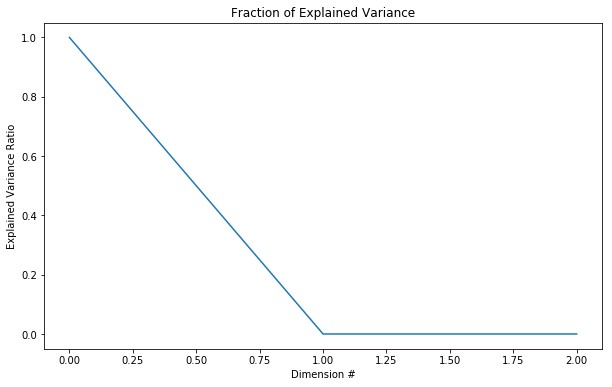

In [157]:
plot_scaled_variance(model)

#### KMeans

In [158]:
def plot_inertia(array, start=1, end=10):
    from sklearn.cluster import KMeans 
    interia = []
    for i in range(start,end+1):
        model = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = 0)
        fit = model.fit(array)
        interia.append(fit.inertia_)
        
        
    x_axis = range(start,end+1)
    
    fig, ax = plt.subplots(figsize=(10,6))
    
    ax.set_title('The elbow method')
    ax.set_ylabel('Inertia')
    ax.set_xlabel('Number of clusters')
    plt.plot(x_axis, interia)
    
    return ax

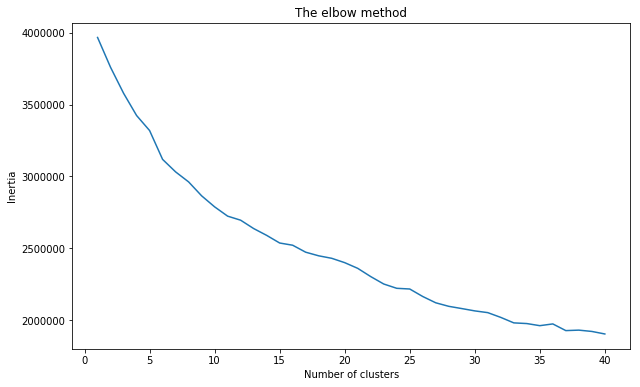

In [165]:
plot_inertia(df_scaled,start=1,end=40)

In [202]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=10,random_state=0)
model = kmeans.fit(df_scaled)
labels = model.fit_predict(df_scaled)

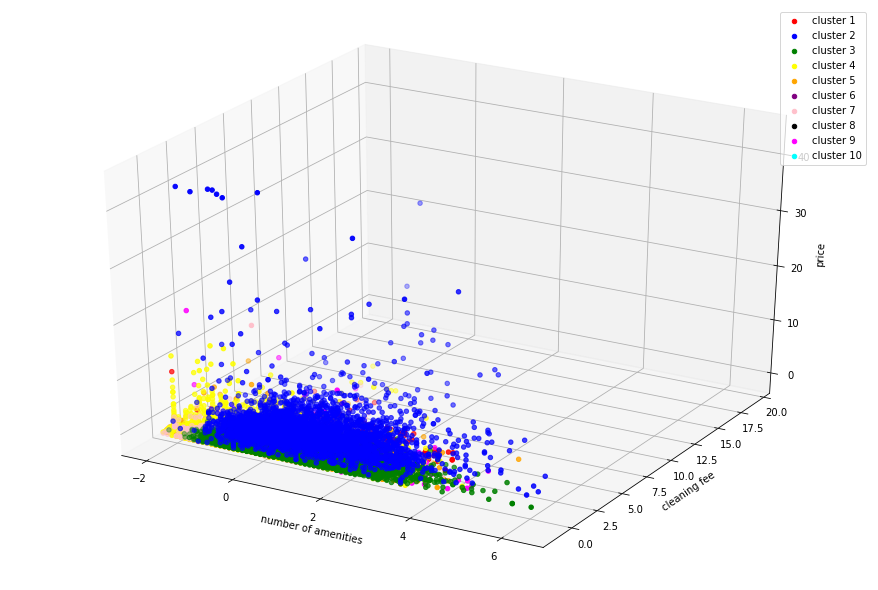

In [245]:
#Visualising the k-means results 
from mpl_toolkits.mplot3d import Axes3D

groups = np.unique(labels)+1
colors = ['red','blue','green','yellow','orange','purple','pink','black','magenta','cyan','gray']

fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
ax.grid=True
for i in range(len(groups)):
    ax.scatter( df_scaled[labels == groups[i], 56], 
                df_scaled[labels == groups[i], 13], 
                df_scaled[labels == groups[i], 11],
                c = colors[i],
                label = ('cluster '+str(groups[i])))
    plt.legend()
    ax.set_xlabel('number of amenities')
    ax.set_ylabel('cleaning fee')
    ax.set_zlabel('price')

In [229]:
var = []
for i in range(len(groups)):
    var.append(np.var(df_scaled[labels == groups[i]]))

Text(0, 0.5, 'variance')

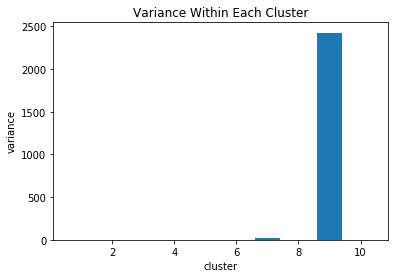

In [242]:
plt.bar(range(1,11),height=var)
plt.title('Variance Within Each Cluster')
plt.xlabel('cluster')
plt.ylabel('variance')

In [219]:
df_scaled[labels == groups[2]].shape

(3582, 79)

In [ ]:
colors[4]

In [71]:
#K-Means on Scaled Values

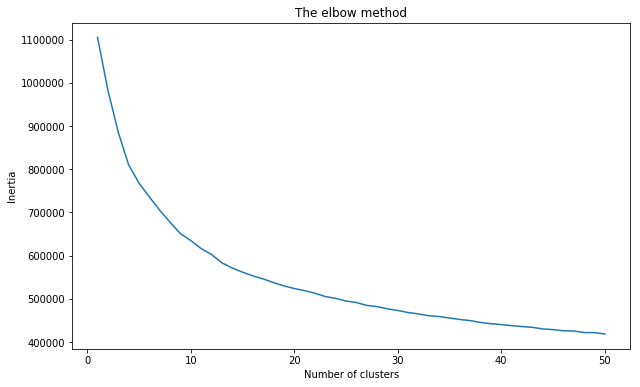

In [104]:
plot_inertia(num_df_scaled,start=1,end=50)

In [108]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=10,random_state=0)

model = kmeans.fit(num_df_scaled)

labels = model.fit_predict(num_df_scaled)

[0 1 2 3 4 5 6 7 8 9]


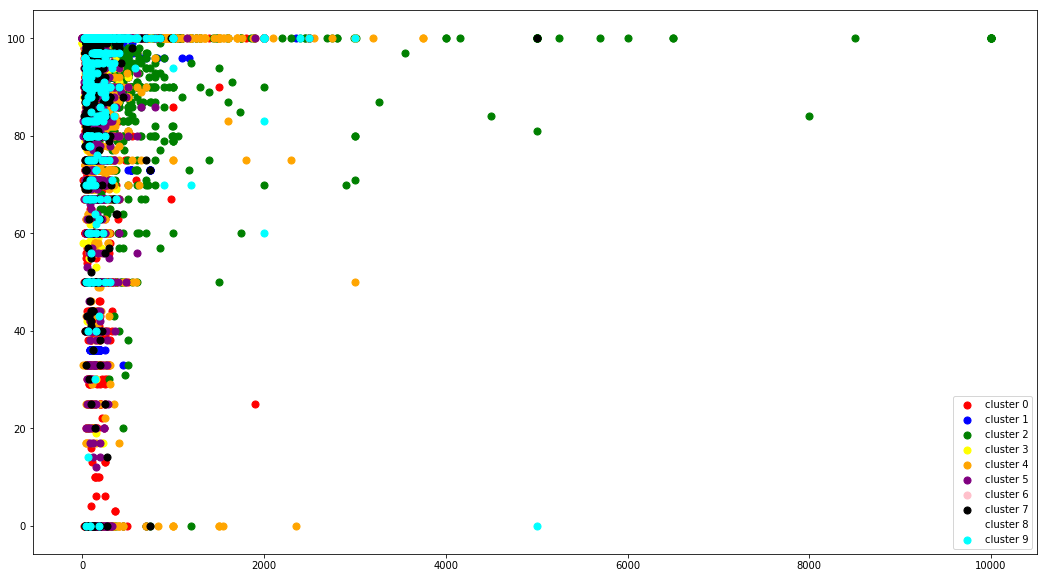

In [119]:
#Visualising the k-means results 

colors =['red','blue','green','yellow','orange','purple','pink','black','white','cyan','gray']
all_clusters = np.unique(labels)
print(all_clusters)

plt.figure(figsize=(18, 10)) 
for i in range(len(all_clusters)):
    plt.scatter(df_array[labels == all_clusters[i], 11], df_array[labels == all_clusters[i], 0], s = 50, 
            c = colors[i], label = ('cluster '+str(all_clusters[i])))
    plt.legend()

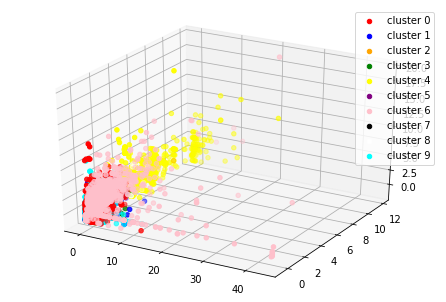

In [110]:
#Visualising the k-means results 
from mpl_toolkits.mplot3d import Axes3D

groups = np.unique(labels)
colors =['red','blue','orange','green','yellow','purple','pink','black','white','cyan','gray']

fig = plt.figure()
ax = Axes3D(fig)
ax.grid=True
for i in range(len(groups)):
    ax.scatter( num_df_scaled[labels == groups[i], 5], 
                num_df_scaled[labels == groups[i], 6], 
                num_df_scaled[labels == groups[i], 7],
                c = colors[i],
                label = ('cluster '+str(groups[i])))
    plt.legend()
    

In [120]:
for i in range(len(groups)):
   num_df_scaled[labels == groups[i]]

In [ ]:
df['cluster'] = labels

In [ ]:
df.groupby(['cluster']).mean()

### tSNE 

(50220, 2)
[[-11.93802      1.7098805 ]
 [ 49.741364     7.440232  ]
 [-20.029146   -25.443972  ]
 [-22.378872   -50.182026  ]
 [ 22.664219    43.933334  ]
 [ 52.259354     6.6880794 ]
 [ 51.02625      7.7200327 ]
 [  0.09082882 -49.37517   ]
 [ -7.2398143   33.28706   ]]


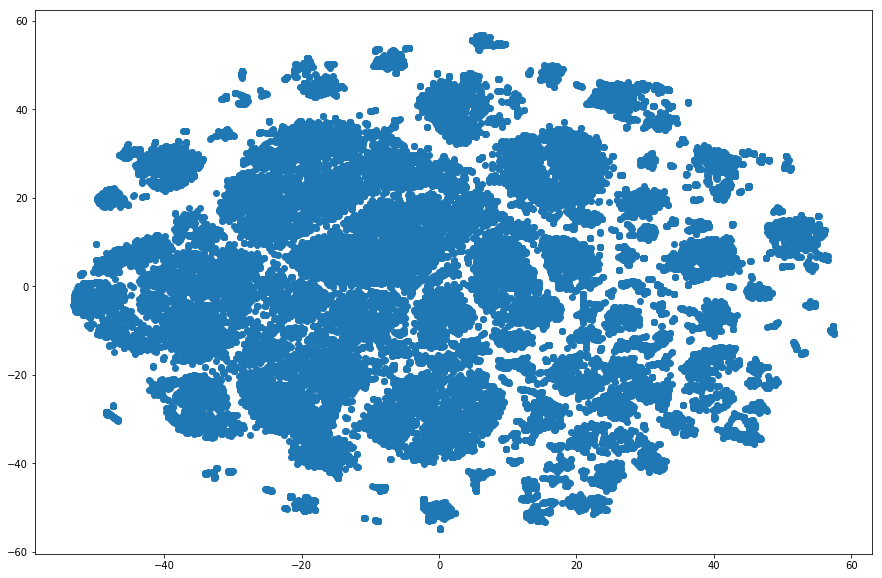

In [81]:
from sklearn.manifold import TSNE

model=TSNE(learning_rate=150)
Tsne_transformed=model.fit_transform(df_scaled)

print(Tsne_transformed.shape)

print(Tsne_transformed[1:10])

xs = Tsne_transformed[:,0]
ys = Tsne_transformed[:,1]

plt.figure(figsize=(15, 10)) 
plt.scatter(xs,ys)

In [122]:
from sklearn.manifold import TSNE

model=TSNE(learning_rate=200)
Tsne_transformed=model.fit_transform(df_scaled)

print(Tsne_transformed.shape)

print(Tsne_transformed[1:10])

xs = Tsne_transformed[:,0]
ys = Tsne_transformed[:,1]

plt.figure(figsize=(14, 9)) 
plt.scatter(xs,ys)

KeyboardInterrupt: 

(50220, 2)
[[  8.525973  -12.686571 ]
 [ 22.152288   27.610563 ]
 [ 18.09815    15.137527 ]
 [ 21.30362   -31.165085 ]
 [-12.857467  -30.116365 ]
 [ 22.779062   29.493235 ]
 [ 22.505955   28.55859  ]
 [-10.183548  -38.851284 ]
 [  2.9558191 -24.209024 ]]


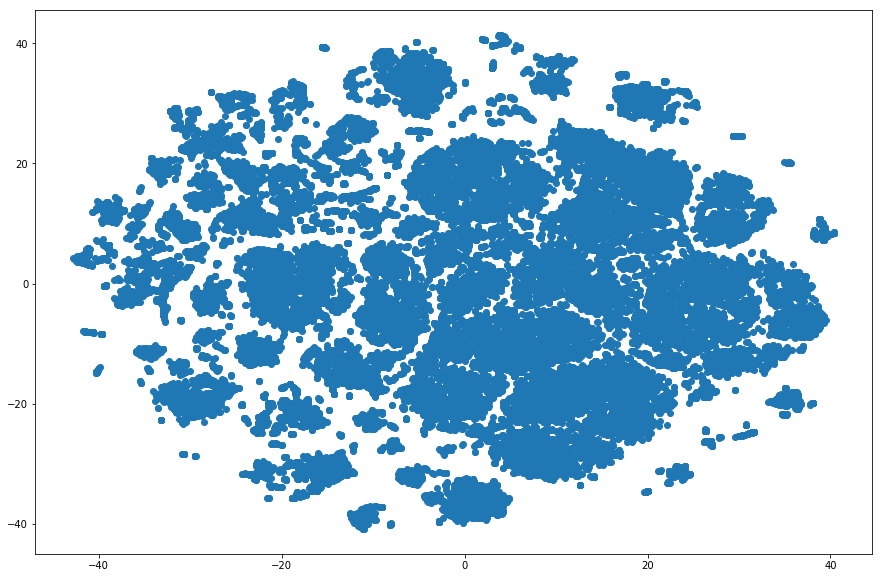

In [112]:
from sklearn.manifold import TSNE

model=TSNE(learning_rate=75)
Tsne_transformed=model.fit_transform(df_scaled)

print(Tsne_transformed.shape)

print(Tsne_transformed[1:10])

xs = Tsne_transformed[:,0]
ys = Tsne_transformed[:,1]

plt.figure(figsize=(15, 10)) 
plt.scatter(xs,ys)

(50220, 2)
[[-11.259373    3.311357 ]
 [-10.702295   -6.700801 ]
 [ -9.500945   17.448427 ]
 [-25.521797   10.938059 ]
 [-11.680976  -23.2678   ]
 [  4.5077453  -9.692315 ]
 [ 18.549837   -9.191766 ]
 [ 24.674952  -12.616274 ]
 [-10.821799  -27.73952  ]]


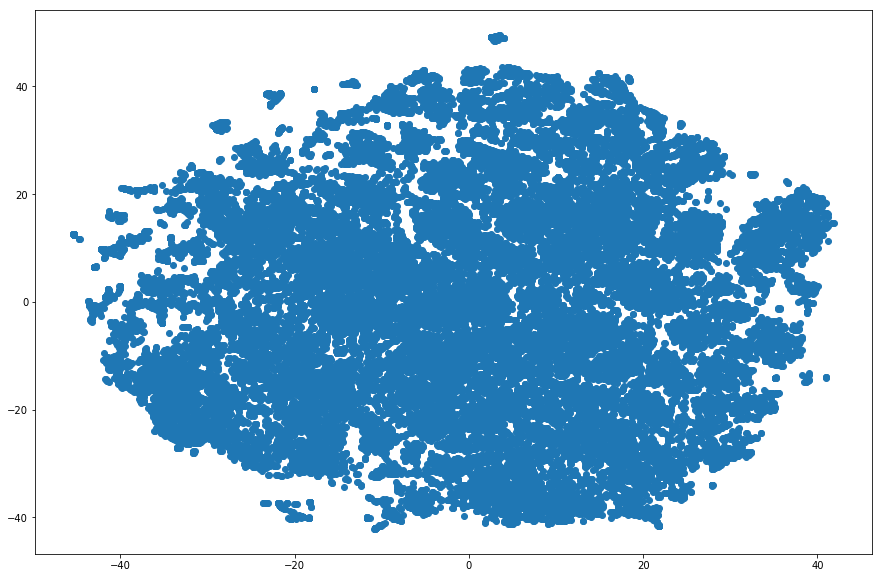

In [121]:
from sklearn.manifold import TSNE

model=TSNE(learning_rate=100)
Tsne_transformed=model.fit_transform(num_df_scaled)

print(Tsne_transformed.shape)

print(Tsne_transformed[1:10])

xs = Tsne_transformed[:,0]
ys = Tsne_transformed[:,1]

plt.figure(figsize=(15, 10)) 
plt.scatter(xs,ys)

In [ ]:
#importing DBSCAN from sklearn
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 4.6, min_samples = 3)

model = dbscan.fit(df_scaled)

dsb_labels = model.fit_predict(df_scaled)


In [ ]:
#Visualising the DBSCAN results 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3d

groups = np.unique(dsb_labels)
colors =['red','blue','orange','green','yellow','purple','pink','black','white','cyan','gray']

fig = plt.figure()
ax = Axes3D(fig)
ax.grid=True
for i in range(len(groups)):
    ax.scatter( df_scaled[dsb_labels == groups[i], 7], 
                df_scaled[dsb_labels == groups[i], 8], 
                df_scaled[dsb_labels == groups[i], 9],
                c = colors[i],
                label = ('cluster '+str(groups[i])))
    plt.legend()
    

In [ ]:
price_acc = df[['price','accommodates']]
price_acc = price_acc.values

In [ ]:
x = df['price']
y = df['accommodates']

plt.scatter(y,x)

In [ ]:
from sklearn import svm

clf = svm.OneClassSVM(nu=0.10, kernel="rbf", gamma=0.1)
clf.fit(price_acc)
pred = clf.predict(price_acc)
normal = price_acc[pred == 1]
abnormal = price_acc[pred == -1]

In [ ]:
plt.figure()
#plt.plot(normal[:,0],normal[:,1],'bx')
plt.plot(abnormal[:,0],abnormal[:,1],'ro')
plt.xlabel('History (ms)')
plt.ylabel('Likes')
plt.show()